# Fix $\beta$ to _Fermi_ best-fit value

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Float $N_D$ and $z_0$

In [18]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge', 'beta']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0,1.34]

floated_params = ['N_disk', 'z0']
floated_param_priors = [[0,3000000],[0.01,2.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 500, Nang = 10, share_betas=True, use_prior=True, Nang_prior=500)

In [19]:
chains_dir = '../run/chains/rs_nd_fixbeta_nlive200/'

In [20]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_global = np.array(rs_nd.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt
  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt


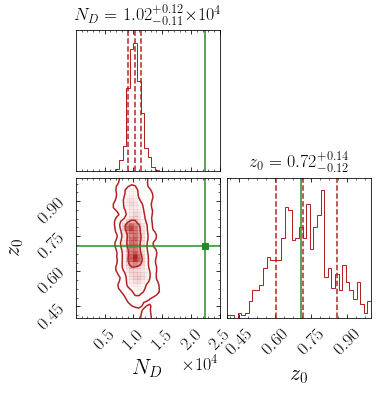

In [21]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$'], truths = [22500, 0.71], param_range = [(0,2.5e4),(0.4,1)],chains_dir=chains_dir)
plt.subplots_adjust(bottom = .2)
# plt.savefig("plots/rs_nd.pdf")

In [22]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -628.963919557


In [23]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt


[('N_disk', 10192.105602275926), ('z0', 0.68307110103004309)]

## Float $N_D$, $N_B$ and $z_0$

Here the best-fit $\beta$ is set to _Fermi_ best-fit.

In [24]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge', 'beta']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,1.24]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0]]

rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 500, Nang = 10, share_betas=True, use_prior=True, Nang_prior=500)

In [25]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [26]:
chains_dir = '../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/'

In [27]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_nb_global = np.array(rs_nd_nb.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt
  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt


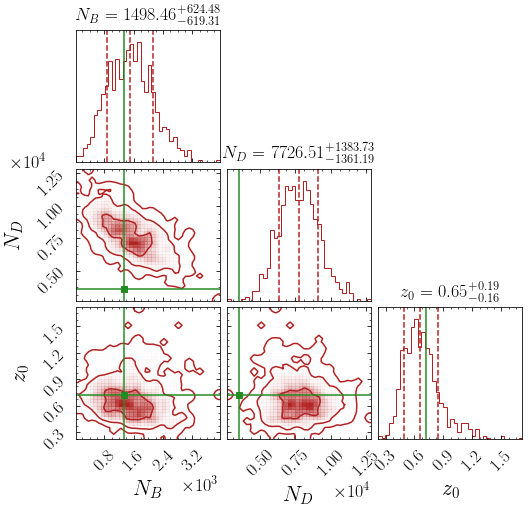

In [28]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$'], truths = [1330, 3560, 0.72],  chains_dir=chains_dir)
plt.subplots_adjust(bottom = .2)
# plt.savefig("plots/rs_nd_nb.pdf")

In [29]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -623.351652968


In [30]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt


[('N_bulge', 1390.4421770005415),
 ('N_disk', 7765.217937827606),
 ('z0', 0.60815285519738482)]

In [31]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 5.61226658907
2.36902228547 sigma


In [32]:
BF = np.exp(lge_nd_nb_global - lge_nd_global)
print "Bayes Factor =", str(BF[0])[:4], "±",  str(BF[1])[:4]

Bayes Factor = 0.01 ± 1.07
